# Importacion de bibliotecas

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modelos y métricas
# import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
# preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#Cross validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


#Modelado
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

# Carga de datos

Creamos una copia del dataset para comenzar a trabajar

In [2]:
ds_hotel=pd.read_csv('./hotels_train_filtrado3.csv')
# ds_hotel = pd.read_csv("https://drive.google.com/uc?id=17TNcgVnEWVsnc5lwM8lFXJx2nVJHlnQpPpDZkdLSi9g")
# ds_hotel = pd.read_csv("https://drive.google.com/file/d/1YZv9nXnHTNsbhZNym-mYPxlUXMoTHcYe/view?usp=sharing")
#https://drive.google.com/file/d/1YZv9nXnHTNsbhZNym-mYPxlUXMoTHcYe/view?usp=sharing
ds_trabajo = ds_hotel.copy()

In [3]:
ds_trabajo = ds_trabajo.drop('adr_group',axis=1)
ds_trabajo = ds_trabajo.drop('score',axis=1)

In [4]:
# ONE HOT ENCODING ...
ds_trabajo_encoded = pd.get_dummies(ds_trabajo, columns=['hotel',
                                                 'market_segment',
                                                 'distribution_channel',
                                                 'is_repeated_guest',
                                                 'deposit_type',
                                                 'customer_type',
                                                 'agent_specified',
                                                 'more_than_zero_days_in_waiting_list',
                                                 'season',
                                                 'region',
                                                 'room_type_match'], drop_first=True)
ds_trabajo_encoded.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests,is_canceled,arrival_date,...,agent_specified_1,more_than_zero_days_in_waiting_list_1,season_Spring,season_Summer,season_Winter,region_Americas,region_Asia,region_Europe,region_Oceania,room_type_match_True
0,1.633333,1.0,2.0,0.0,0,0,115.5,1,1,1.473034e+09,...,1,0,0,1,0,1,0,0,0,1
1,0.133333,0.0,1.0,0.0,0,0,42.0,0,0,1.446250e+09,...,0,0,0,0,0,0,0,1,0,1
2,0.833333,0.0,1.0,0.0,0,0,229.0,2,0,1.476317e+09,...,1,0,0,0,0,0,0,1,0,1
3,0.866667,2.0,5.0,0.0,0,0,75.0,0,1,1.481501e+09,...,1,0,0,0,0,0,0,1,0,1
4,3.466667,2.0,5.0,0.0,0,0,75.0,1,0,1.489882e+09,...,1,0,0,0,1,0,0,1,0,1


Armamos una función para mostrar las métricas y la matriz de confusión de nuestas predicciones.

In [5]:
def mostrar_metricas(y_test, y_pred):
  print(classification_report(y_test,y_pred))

  # Calcular las métricas de evaluación
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Imprimir las métricas de evaluación
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("f1 score:", f1)

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

# Modelo KNN

## Construcción de clasificador KNN


In [ ]:
ds_trabajo_encoded.columns

Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'total_of_special_requests', 'is_canceled', 'arrival_date', 'region',
       'agent_specified', 'total_guests',
       'more_than_zero_days_in_waiting_list', 'season', 'room_type_match',
       'adr_group', 'score'],
      dtype='object')

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo_encoded.drop(['is_canceled'], axis='columns')

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo_encoded['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [ ]:
# Establecer una semilla para reproducibilidad
np.random.seed(42)


#Crear el modelo
KNN_Classifier = KNeighborsClassifier(n_neighbors=5)
#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Entrenar el modelo
KNN_Classifier.fit(x_train, y_train)

#Predicción sobre test
y_pred = KNN_Classifier.predict(x_test)

In [ ]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  12195
total:  18573


In [ ]:
accuracy_score(y_test,y_pred)

0.656598287837183

Vamos a observar distintos rangos para k vecinos y observar su comportamiento respecto del accuracy.

In [ ]:
# from sklearn.model_selection import cross_val_score

# k_range=range(1,100) #cantidad de vecinos a probar

# k_scores=[] # accuracy para cada K utilizado

# for k in k_range:
#     #clasificador Knn
#     knn=KNeighborsClassifier(n_neighbors=k)
#     #uso 10 folds
#     scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
#     #promedio las 10 métricas
#     k_scores.append(scores.mean())

In [ ]:
# plt.plot(k_range, k_scores)
# plt.xlabel('Cantidad de Vecinos')
# plt.xticks(range(1,101,5))
# plt.ylabel('Cross Validation Accuracy')
# plt.title('Accuracy vs Cantidad de Vecinos')
# plt.show()

Nota: corrimos el código de arriba con distintos rangos para k, probamos valores en el rango de 0 a 2000 en distintas ejecuciones y notamos que las precisiones que se obtienen a mayor k son cercanas a 55% para todos estos casos. Por una cuestión de tiempos de ejecución elevados, decidimos dejar de probar valores para k más altos. Por el mismo motivo, dejaremos comentado el código (tarda en ejecutarse aprox. 13 minutos) y, en su lugar, dejaremos el gráfico de precisión vs accuracy para k entre 1 y 100 (en esta iteración hallamos el k más preciso) y las conclusiones pertinentes.

Podemos observar en el gráfico que el pico de precisión se alcanza cuando se observan entre 5 y 10 vecinos más cercanos. Tomaremos este rango para optimizar el hiperparámetro k.

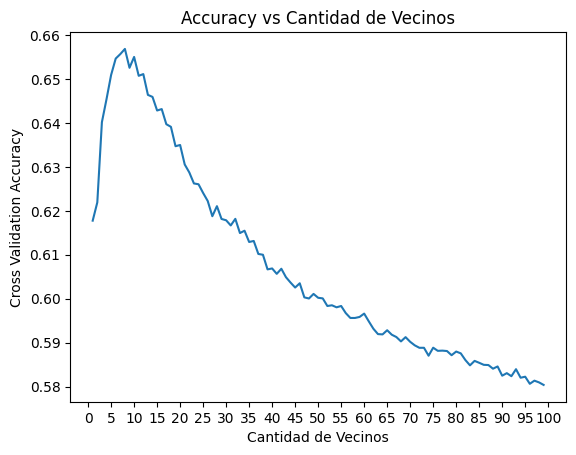

## Optimización de Hiperparámetros

Buscamos optimizar hiperparámetros para llevar nuestra predicción para mejorar el piso de 0.65 obtenido sin optimización. En primer lugar, vamos a ver las distancias que admite cada algoritmo.

In [ ]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

#Métricas Válidas
VALID_METRICS = dict(
    ball_tree=BallTree.valid_metrics,
    kd_tree=KDTree.valid_metrics,
    # The following list comes from the sklearn.metrics.pairwise doc string
    brute=list(PAIRWISE_DISTANCE_FUNCTIONS.keys())
    + [ 'braycurtis','canberra','chebyshev','correlation',
        'cosine','dice','hamming','jaccard','kulsinski',
        'mahalanobis','matching','minkowski','rogerstanimoto',
        'russellrao','seuclidean','sokalmichener','sokalsneath',
        'sqeuclidean','yule','wminkowski',
    ],
)

#Ejemplo
for alg in VALID_METRICS:
    print(f'algoritmo: {alg}')
    print(VALID_METRICS[alg])
    print()

algoritmo: ball_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']

algoritmo: kd_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']

algoritmo: brute
['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']



### Primera iteración (3 algoritmos, 3 métricas comunes)

Vamos a hacer una primera iteración de optimización de hiperparámetros, optimizando accuracy. Dejamos fijo el rango de k vecinos por el motivo anteriormente enunciado. Vamos a hacer 10 iteraciones de random search para los 3 algoritmos posibles y con 3 métricas comunes a todos ellos.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(5, 11), # rango para k de 5 a 10
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.68916548, 0.71435965, 0.72254928, 0.65348926, 0.65334219,
       0.72121874, 0.71405619, 0.72247072, 0.70920104, 0.70927133])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
0.7225492828275932


Obtuvimos un nuevo piso de 0.73 con 9 vecinos, ponderando distancias y utilizando el algoritmo de ball tree midiendo distancias con Manhattan. En particular, vemos que todas las métricas rondan 0.73. 

In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.7308458515048727

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Obtener el mejor modelo ajustado por GridSearchCV
best_model = rand.best_estimator_

# Realizar predicciones sobre los datos de prueba
y_pred = best_model.predict(x_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1 score:", f1)


Accuracy: 0.7308458515048727
Recall: 0.7372574109618255
Precision: 0.7317176420785269
f1 score: 0.7344770807882296


              precision    recall  f1-score   support

           0       0.73      0.72      0.73      9195
           1       0.73      0.74      0.73      9378

    accuracy                           0.73     18573
   macro avg       0.73      0.73      0.73     18573
weighted avg       0.73      0.73      0.73     18573



Text(50.722222222222214, 0.5, 'True')

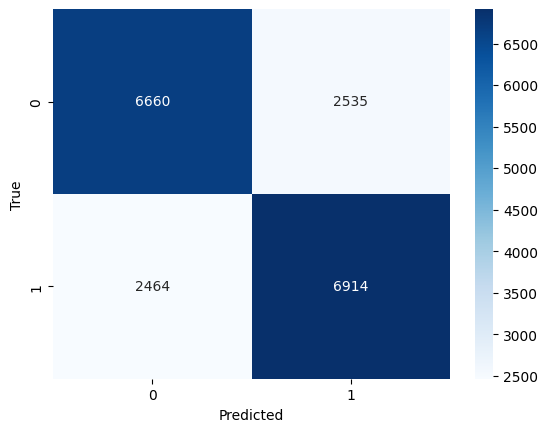

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Segunda iteración (algoritmo kd tree, 5 de sus métricas posibles)

Ahora vamos a probar una iteración para optimizar hiperparámetros con kd tree y algunas de sus métricas.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(5, 11), # rango para k de 5 a 10
              'weights':['distance','uniform'],
              'algorithm':['kd_tree'],
              'metric':['euclidean', 'l2', 'minkowski', 'p', 'manhattan']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=2)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.71389885, 0.71389885, 0.6465093 , 0.65822085, 0.6465093 ,
       0.71426292, 0.6465093 , 0.71490918, 0.68945861, 0.714982  ])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'minkowski', 'algorithm': 'kd_tree'}
0.7149820022237715


Obtuvimos como mejores hiperparámetros para el algoritmo kd tree la métrica cityblock y 7 vecinos cercanos. Ha empeorado la métrica respecto de la iteración anterior.

In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.7248155925267862

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Obtener el mejor modelo ajustado por GridSearchCV
best_model = rand.best_estimator_

# Realizar predicciones sobre los datos de prueba
y_pred = best_model.predict(x_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1 score:", f1)


Accuracy: 0.7248155925267862
Recall: 0.7263808914480699
Precision: 0.7280111146735064
f1 score: 0.7271950894048572


              precision    recall  f1-score   support

           0       0.72      0.72      0.72      9195
           1       0.73      0.73      0.73      9378

    accuracy                           0.72     18573
   macro avg       0.72      0.72      0.72     18573
weighted avg       0.72      0.72      0.72     18573



Text(50.722222222222214, 0.5, 'True')

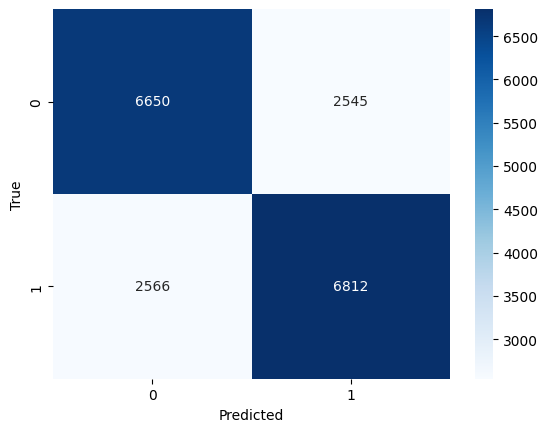

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Tercera iteración (algoritmo kd tree, 4 de sus métricas posibles)

Probaremos otras métricas para kd tree.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(5, 11), # rango para k de 5 a 10
              'weights':['distance','uniform'],
              'algorithm':['kd_tree'],
              'metric':['cityblock', 'l1', 'chebyshev', 'infinity']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=2)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.65353962, 0.72265064, 0.70927133, 0.72357285, 0.64507575,
       0.64842131, 0.71018172, 0.68945861, 0.72211018, 0.72265064])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 7, 'metric': 'l1', 'algorithm': 'kd_tree'}
0.7235728478041434


Logramos un porcentaje de precisión similar al de la primera iteración.

In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.7308996931028913

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Obtener el mejor modelo ajustado por GridSearchCV
best_model = rand.best_estimator_

# Realizar predicciones sobre los datos de prueba
y_pred = best_model.predict(x_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1 score:", f1)


Accuracy: 0.7308996931028913
Recall: 0.7398165920238857
Precision: 0.7306234203875316
f1 score: 0.7351912684115716


              precision    recall  f1-score   support

           0       0.73      0.72      0.73      9195
           1       0.73      0.74      0.74      9378

    accuracy                           0.73     18573
   macro avg       0.73      0.73      0.73     18573
weighted avg       0.73      0.73      0.73     18573



Text(50.722222222222214, 0.5, 'True')

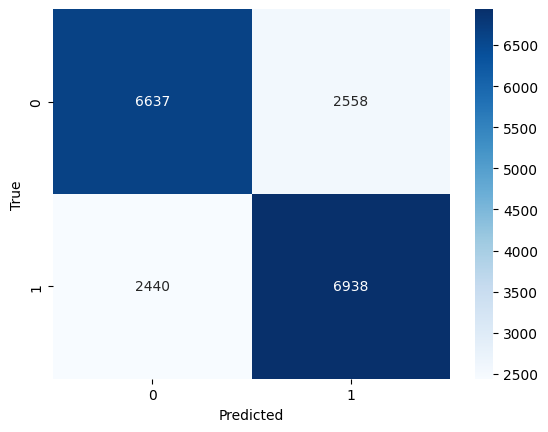

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Cuarta iteración (algoritmo ball tree, 7 de sus métricas posibles)

Ahora vamos a hacer otras iteraciones para optimizar hiperparámetros, esta vez con ball tree y 7 de sus métricas posibles.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(5, 11), # rango para k de 5 a 10
              'weights':['distance','uniform'],
              'algorithm':['ball_tree'],
              'metric':['euclidean', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'infinity']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=2)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.64659074, 0.71390196, 0.6695554 , 0.71496422, 0.70925882,
       0.65348926, 0.71339727, 0.67371556, 0.64825007, 0.72216862])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 6, 'metric': 'l1', 'algorithm': 'ball_tree'}
0.7221686199905626


La precisión sigue siendo similar al de iteraciones anteriores, 73%.

In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.730792009906854

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Obtener el mejor modelo ajustado por GridSearchCV
best_model = rand.best_estimator_

# Realizar predicciones sobre los datos de prueba
y_pred = best_model.predict(x_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1 score:", f1)


Accuracy: 0.730792009906854
Recall: 0.7413094476434208
Precision: 0.7297921478060047
f1 score: 0.7355057130765976


              precision    recall  f1-score   support

           0       0.73      0.72      0.73      9195
           1       0.73      0.74      0.74      9378

    accuracy                           0.73     18573
   macro avg       0.73      0.73      0.73     18573
weighted avg       0.73      0.73      0.73     18573



Text(50.722222222222214, 0.5, 'True')

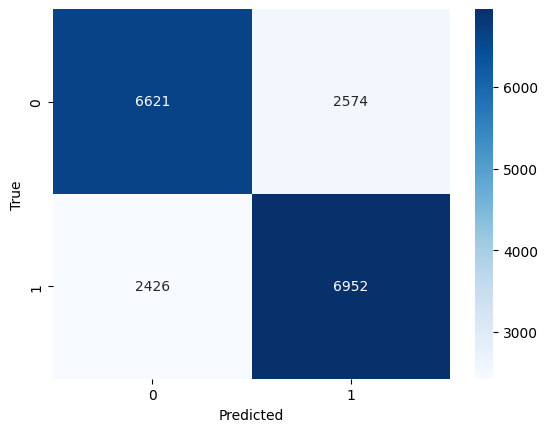

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Quinta iteración (algoritmo ball tree, 4 de sus métricas posibles)

Probaremos optimizar otras métricas para el algoritmo ball tree.

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# #Grilla de Parámetros
# params_grid={ 'n_neighbors':range(5, 11), # rango para k de 5 a 10
#               'weights':['distance','uniform'],
#               'algorithm':['ball_tree'],
#               'metric':['hamming', 'jaccard', 'chebyshev', 'l1']
#              }

# #Clasificador KNN
# knn=KNeighborsClassifier()

# #Random Search con 10 Folds y 10 iteraciones
# rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=2)

# rand.fit(x_train, y_train)
# rand.cv_results_['mean_test_score']

In [ ]:
# #Mejores hiperparametros
# print(rand.best_params_)
# #Mejor métrica
# print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'hamming', 'algorithm': 'ball_tree'}
0.7929459769269663


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

In [ ]:
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# # Obtener el mejor modelo ajustado por GridSearchCV
# best_model = rand.best_estimator_

# # Realizar predicciones sobre los datos de prueba
# y_pred = best_model.predict(x_test)

# # Calcular las métricas de evaluación
# accuracy = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# # Imprimir las métricas de evaluación
# print("Accuracy:", accuracy)
# print("Recall:", recall)
# print("Precision:", precision)
# print("f1 score:", f1)


Accuracy: 0.7308996931028913
Recall: 0.7398165920238857
Precision: 0.7306234203875316
f1 score: 0.7351912684115716


              precision    recall  f1-score   support

           0       0.73      0.72      0.73      9195
           1       0.73      0.74      0.74      9378

    accuracy                           0.73     18573
   macro avg       0.73      0.73      0.73     18573
weighted avg       0.73      0.73      0.73     18573



Text(50.722222222222214, 0.5, 'True')

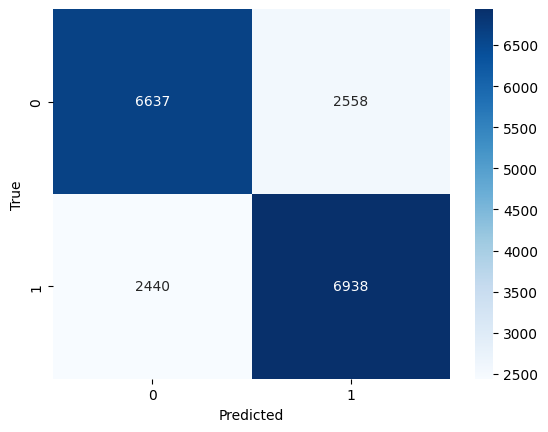

In [ ]:
# from sklearn.metrics import confusion_matrix,classification_report

# #Reporte de Clasificación
# print(classification_report(y_test,y_pred))

# #Matriz de Confusión
# cm = confusion_matrix(y_test,y_pred)
# sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('True')

Nota: esta quinta iteración tardó cerca de 40min en ejecutarse, por este motivo vamos a dejar comentado el random search y vamos a generar el clasificador y mostrar las métricas con los hiperparámetros optimizados. Obtuvimos, como mejores hiperparámetros, distancias ponderadas, 5 vecinos cercanos, métrica de hamming y algoritmo de ball tree. Logramos un 79% de precisión.

In [ ]:
knn=KNeighborsClassifier(weights="distance", n_neighbors=5, metric="hamming", algorithm="ball_tree")
knn.get_params()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Cantidad de aciertos
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))
accuracy_score(y_test,y_pred)


correctas:  14821
total:  18573


0.7979863242341033

In [ ]:
# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1 score:", f1)

Accuracy: 0.7979863242341033
Recall: 0.8037961185753892
Precision: 0.7976719576719576
f1 score: 0.800722328446994


              precision    recall  f1-score   support

           0       0.80      0.79      0.80      9195
           1       0.80      0.80      0.80      9378

    accuracy                           0.80     18573
   macro avg       0.80      0.80      0.80     18573
weighted avg       0.80      0.80      0.80     18573



Text(50.722222222222214, 0.5, 'True')

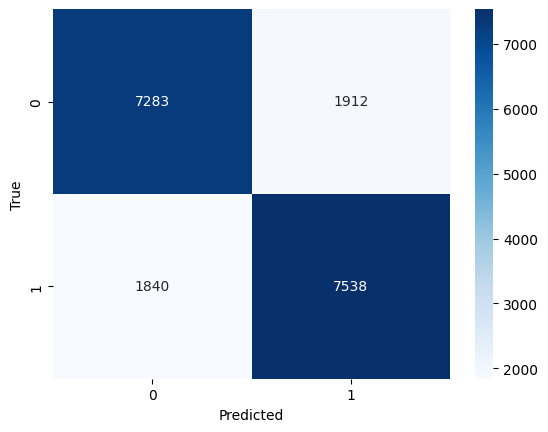

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Sexta iteración (algoritmo brute)

En esta iteración, probaremos el algoritmo brute con métricas 'cosine', 'haversine', 'canberra', 'chebyshev', 'correlation' para optimizar hiperparámetros.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(5, 11), # rango para k de 5 a 10
              'weights':['distance','uniform'],
              'algorithm':['brute'],
              'metric':['cosine', 'haversine', 'canberra', 'chebyshev', 'correlation']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=2)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.70917244, 0.52027756, 0.64466751, 0.43588733,        nan,
       0.71013009, 0.78295954, 0.80511304, 0.50744157, 0.80860509])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'canberra', 'algorithm': 'brute'}
0.8086050881447246


Obtuvimos como mejores hiperparámetros con brute la métrica canberra y 9 vecinos cercanos. Obtuvimos un 81% de precisión, siendo esta la mejor obtenida hasta el momento con KNN.

In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.8157540515802509

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Obtener el mejor modelo ajustado por GridSearchCV
best_model = rand.best_estimator_

# Realizar predicciones sobre los datos de prueba
y_pred = best_model.predict(x_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1 score:", f1)


Accuracy: 0.8157540515802509
Recall: 0.807954787801237
Precision: 0.8237660360948033
f1 score: 0.8157838070628768


              precision    recall  f1-score   support

           0       0.81      0.82      0.82      9195
           1       0.82      0.81      0.82      9378

    accuracy                           0.82     18573
   macro avg       0.82      0.82      0.82     18573
weighted avg       0.82      0.82      0.82     18573



Text(50.722222222222214, 0.5, 'True')

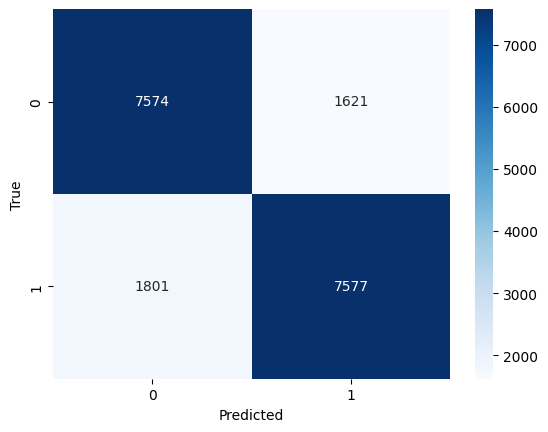

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

## Análisis de las métricas de los mejores hiperparámetros hallados y generación del modelo para KNN

Dadas las iteraciones mostradas anteriormente, nos quedaremos con la sexta ya que tiene las mejores métricas. A continuación, mostraremos las mismas y su matriz de confusión para hacer un análisis de nuestro clasificador KNN.

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

best_knn=KNeighborsClassifier(weights="distance", n_neighbors=9, metric="canberra", algorithm="brute")
best_knn.get_params()
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
#Cantidad de aciertos
print('correctas:', np.sum(y_test == y_pred))
print('total:', len(y_test))
# accuracy_score(y_test,y_pred)


# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1 score:", f1)

correctas: 18492
total: 18573
Accuracy: 0.9956388305604911
Recall: 0.9920025591810621
Precision: 0.9993554624556881
f1 score: 0.9956654358645047


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9195
           1       1.00      0.99      1.00      9378

    accuracy                           1.00     18573
   macro avg       1.00      1.00      1.00     18573
weighted avg       1.00      1.00      1.00     18573



Text(50.722222222222214, 0.5, 'True')

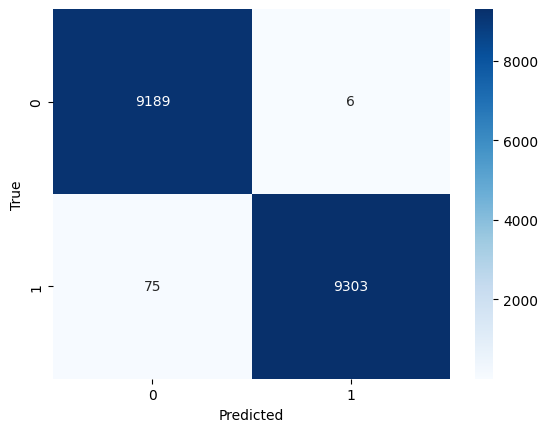

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

El modelo ha predicho correctamente la cancelación o no-cancelación de la reserva en un 81,57%, dada su accuracy. Además, según el recall obtenido, el modelo identifica correctamente el 80,80% de todas las cancelaciones de reservas en el conjunto de datos. El precision del modelo es del 82,38%, lo que significa que, de todas las predicciones que hizo el modelo de que la reserva sería cancelada, el 82,38% de ellas son realmente cancelaciones. Finalmente, el valor de f1-score es del 81,58%.

Exportamos el modelo en formato pickle.

In [ ]:
import pickle

with open('models/knn/knn_model.pickle', 'wb') as archivo:
    pickle.dump(best_knn, archivo)

# Modelo SVM

Vamos a normalizar los datos para obtener un conjunto con desviación estándar unitaria para cada característica y obtener una buena predicción

In [6]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo_encoded.drop(['is_canceled'], axis='columns')

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo_encoded['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test) 

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

Vamos a probar entrenar un modelo SVM con los datos escalados con normalización y con minmax, y veremos cuál tiene mejores métricas para trabajar con eso.

In [7]:
#Construyo un modelo SVM  
svm_norm= SVC()

#Lo entreno con los datos escalados con normalizacion
svm_norm.fit(x_train_norm, y_train)

#Hago la prediccion y calculo las métricas
y_pred_norm=svm_norm.predict(x_test_norm)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      9195
           1       0.84      0.76      0.80      9378

    accuracy                           0.80     18573
   macro avg       0.81      0.80      0.80     18573
weighted avg       0.81      0.80      0.80     18573

Accuracy: 0.8040704248102084
Recall: 0.7570910641927916
Precision: 0.8391443091833116
f1 score: 0.7960087448848029


Text(50.722222222222214, 0.5, 'True')

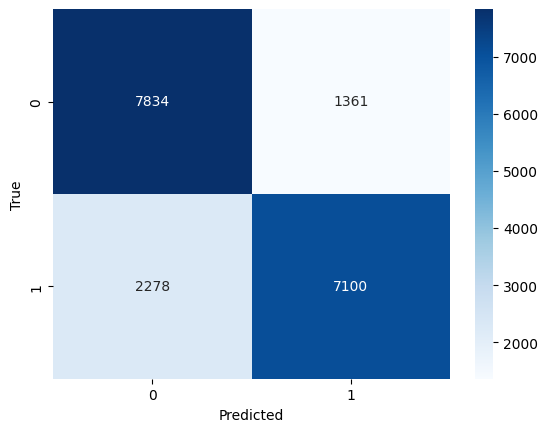

In [8]:
print(classification_report(y_test,y_pred_norm))

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_norm)
recall = recall_score(y_test, y_pred_norm)
precision = precision_score(y_test, y_pred_norm)
f1 = f1_score(y_test, y_pred_norm)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1 score:", f1)

cm = confusion_matrix(y_test,y_pred_norm)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [9]:
# #Construyo un modelo SVM  
# svm_minmax= SVC()

# #Lo entreno con los datos escalados con min max
# svm_minmax.fit(x_train_minmax, y_train)

# #Hago la prediccion y calculo las métricas
# y_pred_minmax=svm_minmax.predict(x_test_minmax)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      9195
           1       0.82      0.71      0.76      9378

    accuracy                           0.78     18573
   macro avg       0.78      0.78      0.78     18573
weighted avg       0.78      0.78      0.78     18573

Accuracy: 0.7761804770365585
Recall: 0.7070804009383664
Precision: 0.8246486755378685
f1 score: 0.7613525460703829


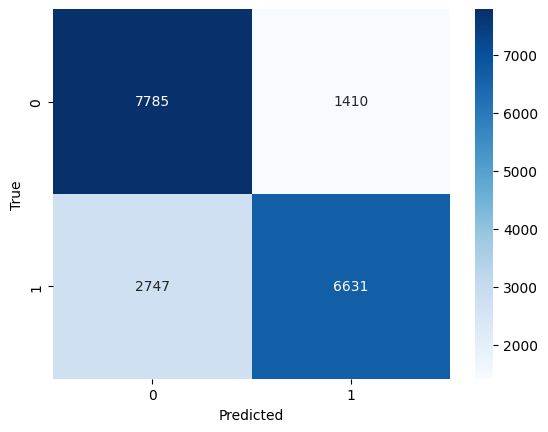

In [10]:
# mostrar_metricas(y_test, y_pred_minmax)

La predicción con el escalado normalizado fue mejor que con el minmax, vamos a utilizar entonces los datos normalizados para optimizar hiperparámetros.:

Ahora vamos a aplicar PCA para reducir la dimensionalidad de nuestro problema. 

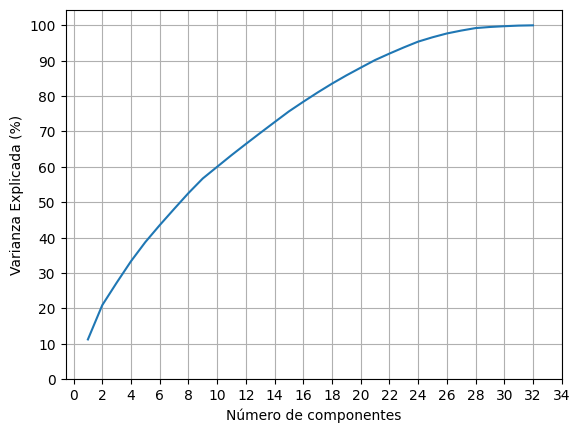

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA sobre los datos escalados
pca = PCA(n_components = None)
pca.fit(x_train_norm)

#Cantidad de Componentes
componentes = len(pca.explained_variance_ratio_) 

#Grafico la Varianza Explicada 
plt.plot(range(1,componentes+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componentes")
plt.xticks(range(0,36,2))
plt.yticks(range(0,101,10))
plt.ylabel("Varianza Explicada (%)")
# Agregar una grilla al gráfico
plt.grid()
plt.show()

En el gráfico vemos que con los primeros 20 componentes principales se explica casi el 90% de la variabilidad de los datos.

Probaremos entrenar una SVM tomando sólo esas primeras 20 componentes.

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     10159
           1       0.75      0.83      0.79      8414

    accuracy                           0.79     18573
   macro avg       0.80      0.80      0.79     18573
weighted avg       0.80      0.79      0.80     18573

Accuracy: 0.7946481451569483
Recall: 0.8306394105062991
Precision: 0.7452548517807634
f1 score: 0.7856339928057553


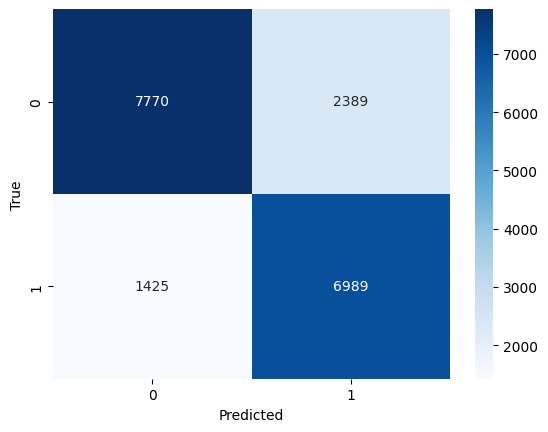

In [8]:
from sklearn.pipeline import Pipeline

#Defino el tipo de escalado, la transformacion PCA y el modelo
_sc = StandardScaler()
_pca = PCA(n_components = 20)
_model = SVC()

#Creo un pipeline
svm_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('svm', _model)
])

#Entreno sobre los datos que serán previamente escalados y transformados
svm_model.fit(x_train,y_train)

#Hago la predicción y calculo las métricas
y_pred_pca=svm_model.predict(x_test)
mostrar_metricas(y_pred_pca,y_test)

## SVM con Kernel Lineal

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      9215
           1       0.75      0.75      0.75      9358

    accuracy                           0.75     18573
   macro avg       0.75      0.75      0.75     18573
weighted avg       0.75      0.75      0.75     18573

Accuracy: 0.7471598557045173
Recall: 0.7501602906603975
Precision: 0.7485604606525912
f1 score: 0.7493595217762595


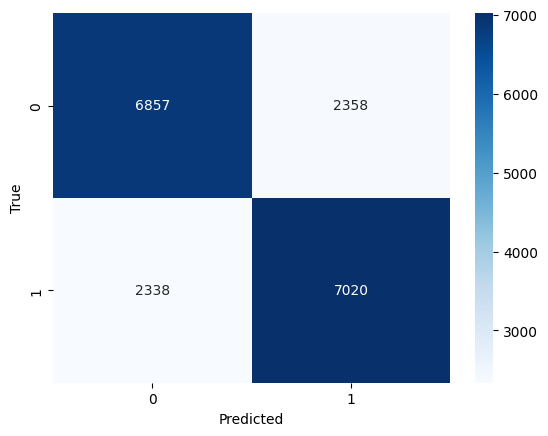

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#Defino el tipo de escalado y la transformacion PCA
_sc = StandardScaler()
_pca = PCA(n_components = 20)

#Creo un pipeline con escalado y reducción de dimensionalidad
pca_pipe = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca)
])

#Aplico el pipeline a los datos de entrenamiento
x_train_pca = pca_pipe.fit_transform(x_train_norm)

#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='linear', C=8)

#Entreno el clasificador con los datos de entrenamiento reducidos de dimensionalidad
clf.fit(x_train_pca, y_train)

#Aplico el pipeline a los datos de prueba
x_test_pca = pca_pipe.transform(x_test_norm)

#Hago la predicción y calculo las métricas
y_pred_lin_pca = clf.predict(x_test_pca)
mostrar_metricas(y_pred_lin_pca, y_test)


## SVM con Kernel Radial

              precision    recall  f1-score   support

           0       0.88      0.73      0.80     11139
           1       0.68      0.85      0.76      7434

    accuracy                           0.78     18573
   macro avg       0.78      0.79      0.78     18573
weighted avg       0.80      0.78      0.78     18573

Accuracy: 0.778280299359285
Recall: 0.8537799300511165
Precision: 0.6767967583706547
f1 score: 0.7550559124434928


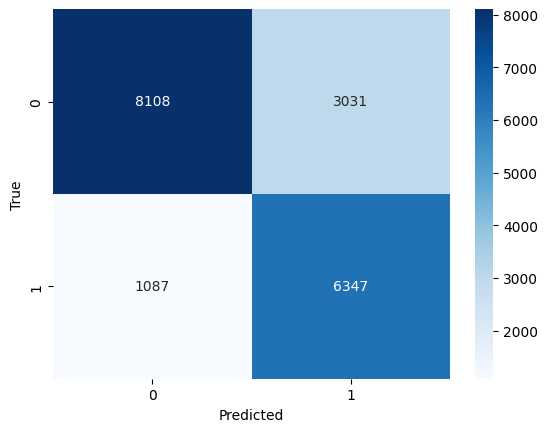

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#Defino el tipo de escalado y la transformacion PCA
_sc = StandardScaler()
_pca = PCA(n_components = 20)

#Creo un pipeline con escalado y reducción de dimensionalidad
pca_pipe = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca)
])

#Aplico el pipeline a los datos de entrenamiento
x_train_pca = pca_pipe.fit_transform(x_train_norm)

clf = SVC(kernel='rbf', C=7, gamma=10)

#Entreno el clasificador con los datos de entrenamiento reducidos de dimensionalidad
clf.fit(x_train_pca, y_train)

#Aplico el pipeline a los datos de prueba
x_test_pca = pca_pipe.transform(x_test_norm)

#Hago la predicción y calculo las métricas
y_pred_lin_pca = clf.predict(x_test_pca)
mostrar_metricas(y_pred_lin_pca, y_test)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#Defino el tipo de escalado y la transformacion PCA
_sc = StandardScaler()
_pca = PCA(n_components = 20)

#Creo un pipeline con escalado y reducción de dimensionalidad
pca_pipe = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca)
])

#Aplico el pipeline a los datos de entrenamiento
x_train_pca = pca_pipe.fit_transform(x_train_norm)

clf = SVC(kernel='rbf', C=8, gamma=16)

#Entreno el clasificador con los datos de entrenamiento reducidos de dimensionalidad
clf.fit(x_train_pca, y_train)

#Aplico el pipeline a los datos de prueba
x_test_pca = pca_pipe.transform(x_test_norm)

#Hago la predicción y calculo las métricas
y_pred_lin_pca = clf.predict(x_test_pca)
mostrar_metricas(y_pred_lin_pca, y_test)


# Modelo RF

Nota CB: creeria que esta de mas hacer la separacion train test en cada apartado de modelos, no me rompe porque corro de a uno... lo pruebo en otro momento

Nota 2 CB: lo estuve corriendo en colab todo el día, por una cuestión de tiempos subo esto a git sin correr para que tengan los últimos cambios. Igualmente las métricas logradas están por encima de 80% para todas ellas, los mejores hiperparámetros que fui consiguiendo los tengo separados para generar el modelo si no llego a conseguir mejores.

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo_encoded.drop(['is_canceled'], axis='columns')

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo_encoded['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

Hacemos una primera predicción con la implementación default de RandomForest para establecer un piso de métricas

In [ ]:
rfc = RandomForestClassifier()
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)
#Predicción sobre test
y_pred = rfc.predict(x_test)

mostrar_metricas(y_test, y_pred)

Obtenemos unas buenas métricas con RF por default. Observando la importancia de características, vemos que el modelo considera importantes `lead_time`, `arrival_date` y `adr` principalmente.

In [ ]:
sorted(list(zip(ds_trabajo_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

Ahora vamos a optimizar hiperparámetros intentando mejorar el F1 score.

In [ ]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : range(1,15,2), 
               "min_samples_split" : range(2,21,2), 
               "n_estimators": [10,20,50,80] }

#Probamos entrenando sólo con 1 métrica
gs = GridSearchCV(estimator=rf_cv, param_grid=param_grid, scoring="f1", cv=5, n_jobs=-1)
gs_fit = gs.fit(X = x_train, y = y_train)

gs_fit.best_params_

In [ ]:
#Obtenemos el mejor modelo
rf_cv_best=gs_fit.best_estimator_

#Predicción
y_pred = rf_cv_best.predict(x_test)

Analizamos las métricas

In [ ]:
mostrar_metricas(y_test, y_pred)

Probamos optimización multi métrica

In [ ]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50, 80] }

#Probamos entrenando con varias métricas

metricas=['accuracy','f1','roc_auc'] #'recall','precision'

gs_multimetrica = GridSearchCV(estimator=rf_cv, 
                               param_grid=param_grid, 
                               scoring=metricas, 
                               refit=False, 
                               cv=5, 
                               n_jobs=-1)
#Entrenamiento
gs_multimetrica_fit = gs_multimetrica.fit(X = x_train, y = y_train)

Y graficamos los resultados

In [ ]:
labels=[ key for key in gs_multimetrica_fit.cv_results_.keys() if("mean_test" in key)]

for k in labels:
    plt.plot(gs_multimetrica_fit.cv_results_[k],linestyle='--' , linewidth=0.8,marker='o',markersize=2)     
    x_linea=np.argmax(gs_multimetrica_fit.cv_results_[k])
    plt.axvline(x_linea,linestyle='--' ,linewidth=0.8,color='grey')
        
plt.xlabel("modelo", fontsize=10)
plt.ylabel("métrica", fontsize=10)
plt.legend(labels)
plt.show()

Realizamos una predicción

In [ ]:
params_elegidos=gs_multimetrica_fit.cv_results_['params'][np.argmax(gs_multimetrica_fit.cv_results_['mean_test_f1'])]
params_elegidos

In [ ]:
#Creamos un clasificador RF
rfc_multimetrica = RandomForestClassifier(criterion= params_elegidos['criterion'], 
                                          min_samples_leaf= params_elegidos['min_samples_leaf'], 
                                          min_samples_split= params_elegidos['min_samples_split'], 
                                          n_estimators=params_elegidos['n_estimators'], 
                                          oob_score=True, random_state=2, n_jobs=-1)
#Entrenamos un modelo
model_rfc_multimetrica = rfc_multimetrica.fit(X = x_train, y = y_train)

#Hacemos una predicción
y_pred = model_rfc_multimetrica.predict(x_test)

In [ ]:
mostrar_metricas(y_test, y_pred)